### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds nice background to graphics
%matplotlib inline 


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
user=pd.read_csv('user.csv')
item=pd.read_csv('item.csv')
data=pd.read_csv('data.csv')


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
print(" Working on data Set-------user")
print(user.head()) # display 5 rows of the table
print(user.shape) # length of corresponding array dimension
print(user.info()) # Give concise summary of the data
print(user.describe(include='all')) # describel all values in dataframe
print(" Describe only Age that make more sense")
print(user.age.describe()) # display describe only for age, that make more sense in dataframe
print(user.isnull().sum()) # checking any missing values

print("######################################################")# just to distinguish operation done on different data sets

print(" Working on data Set ---------item")
print(item.head())
print(item.shape)
print(item.info())
print(item.describe())
print(item.isnull().sum())

print("######################################################")# just to distinguish operation done on different data sets
print(" Working on data Set ---------data")
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())
print(data.isnull().sum())



 Working on data Set-------user
   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
(943, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
           user id         age gender occupation zip code
count   943.000000  943.000000    943        943      943
unique         NaN         NaN      2         21      795
top            NaN         NaN      M    student    55414
freq           NaN     

#### 4. Find the number of movies per genre using the item data - 5 marks

In [89]:
# use sum on the default axis

genre=item.drop(['movie id','movie title', 'release date'],axis=1) # dropping columns other than genre
genre.sum(axis=0) # finding sum along the columns


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [92]:
#hint: use sum on the axis = 1

col_names=item.columns.tolist()
col_names.remove("movie id")
col_names.remove("movie title")
col_names.remove("release date")
print(col_names)
# item['sum'] = item[col_names].sum(axis=1)
# item.head()


#list ='unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
#'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'sum']







['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'sum']


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [94]:
item.drop(item[item['unknown'] >0].index, inplace = True) # dropping the unknown Genre

item[item['unknown']>0]



,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

AxesSubplot(0.125,0.749828;0.775x0.130172)
AxesSubplot(0.125,0.593621;0.775x0.130172)
AxesSubplot(0.125,0.437414;0.775x0.130172)
AxesSubplot(0.125,0.281207;0.775x0.130172)
0       01-Jan-1995
1       01-Jan-1995
2       01-Jan-1995
3       01-Jan-1995
4       01-Jan-1995
           ...     
1676    06-Feb-1998
1677    06-Feb-1998
1678    01-Jan-1998
1679    01-Jan-1994
1680    08-Mar-1996
Name: release date, Length: 1681, dtype: object
AxesSubplot(0.125,0.125;0.775x0.130172)


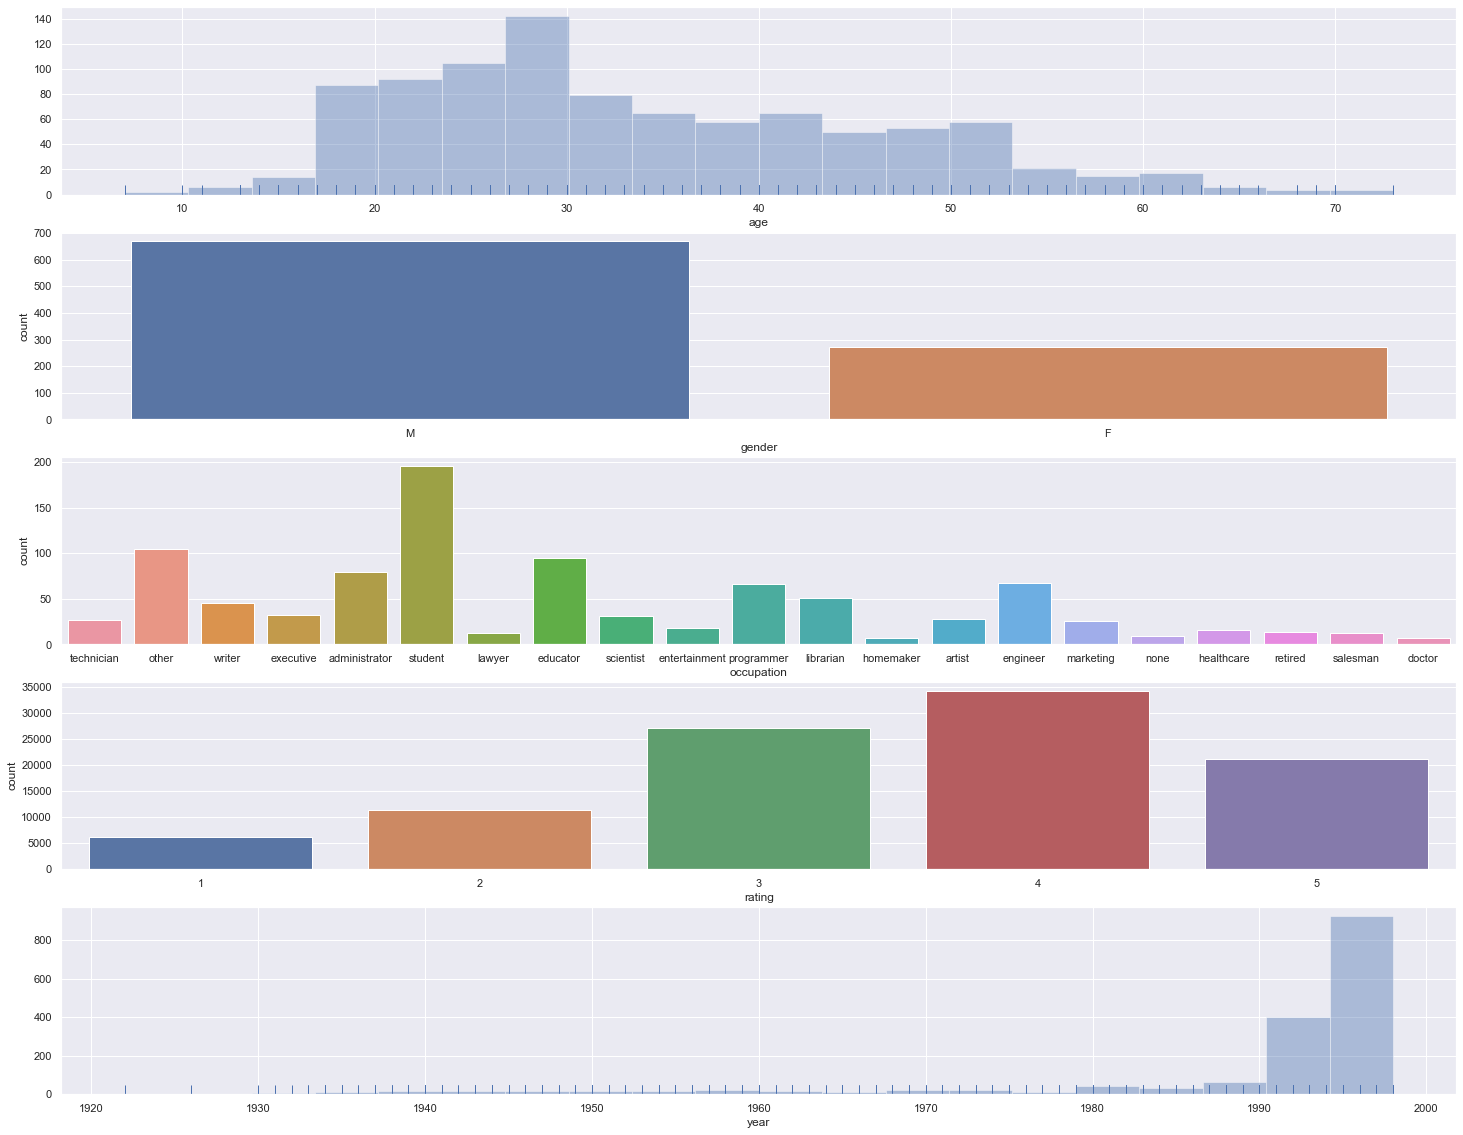

In [45]:
#your answers here
fig_dims = (25, 20)
fig, axs = plt.subplots(nrows=5,figsize=fig_dims)
print(sns.distplot(user['age'],kde=False,rug=True,bins=20,ax=axs[0]));
print(sns.countplot(user['gender'],ax=axs[1]));
print(sns.countplot(user['occupation'],ax=axs[2]));
print(sns.countplot(data['rating'],ax=axs[3]));

print(item['release date'])
item['date'] = pd.to_datetime(item['release date'])
item['year'] = item['date'].dt.year
item.head()
print(sns.distplot(item['year'],kde=False,rug=True,bins=20,ax=axs[4]));


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [122]:
#Your answer here
item['year'] = pd.DatetimeIndex(item['release date']).year
item.head()

item1 = item.set_index([ 'movie id','year','sum']) # setting the Index
grouped = item1.groupby(level=item1.index.names.difference(['movie id','sum'])) # ignoring not required index names
trend=grouped.sum()
trend


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [206]:
#your answer here

data.head()
item.head()
new_data= pd.merge(data,item,how='left',on='movie id')
new_data
new_data1=new_data[['movie title','rating']]
new_data1
# grouped=new_data1.groupby(['movie title','rating'])

grouped = new_data1.groupby('movie title')
sample=grouped['rating'].agg([np.sum, np.mean])
movies=[sample[Sample['sum']>100]]
print(movies)



[                                 sum      mean
movie title                                   
101 Dalmatians                   317  2.908257
12 Angry Men                     543  4.344000
187                              124  3.024390
2 Days in the Valley             300  3.225806
20,000 Leagues Under the Sea     252  3.500000
...                              ...       ...
Wyatt Earp                       155  3.100000
Young Frankenstein               789  3.945000
Young Guns                       324  3.207921
Young Guns II                    122  2.772727
Young Poisoner's Handbook, The   137  3.341463

[764 rows x 2 columns]]


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [69]:
user_data=pd.merge(user,data,how='left',on='user id') # merging left user and data on User ID
user_data_item=pd.merge(user_data,item,how='left',on='movie id') # merging left on movie ID
# user_data_item.head() # new data set is a combination of three data sets
# gender_drama_men=user_data_item.groupby(['gender', 'Drama']).get_group(('M',1))
user_data_item.columns

df11=user_data_item[['gender','Drama']]
df11




,gender,Drama
0,M,1.0
1,M,0.0
2,M,0.0
3,M,1.0
4,M,1.0
...,...,...
99995,M,0.0
99996,M,0.0
99997,M,0.0
99998,M,0.0
